# Buy and Hold Strategy

The buy and hold is an investment strategy in which the investor buys stocks and hold them for the long term. The holding period of the stocks can vary from months to years or even decades. In this buy and hold strategy, you create a portfolio of eight stocks from the US market and rebalance them every month.  

After completing this notebook, you will be to code buy and hold strategy and plot the portfolio returns. 


In this notebook, you will perform the following steps:

1. [Read daily stocks data](#read)
2. [Convert daily to monthly data](#monthly)
3. [Calculate monthly returns](#monthly_returns)
4. [Calculate portfolio returns](#portfolio_returns)
5. [Plot cumulative portfolio returns](#plot)

Read daily stocks data
The closing price of the stocks are stored in the csv file. read_csv method of pandas can be used the read csv files.

Syntax:

import pandas as pd
pd.read_csv(filename,index_col)
1. filename: name of the file in the string format
2. index_col: column(s) to use as the row labels of the dataframe, either given as string name or column index



__Читайте ежедневные данные по запасам
Цена закрытия акций хранится в csv-файле. метод read_csv панд можно использовать для чтения csv-файлов.__

__Синтаксис:__

импорт панд как pd
pd.read_csv(имя файла,index_col)
1. имя файла: имя файла в строковом формате
2. index_col: столбец(ы) для использования в качестве меток строк фрейма данных, либо заданный как имя строки, либо индекс столбца

In [41]:
# Import pandas as pd
import pandas as pd

# Read the stocks data stored in a csv file
daily_stocks_data = pd.read_csv('TSLA.csv', index_col=0)


# Set the index to datetime
daily_stocks_data.index = pd.to_datetime(daily_stocks_data.index)
daily_stocks_data.head(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


In [42]:
daily_stocks_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
daily_stocks_data=daily_stocks_data['Close']

daily_stocks_data

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-01-28    566.900024
2020-01-29    580.989990
2020-01-30    640.809998
2020-01-31    650.570007
2020-02-03    780.000000
Name: Close, Length: 2416, dtype: float64

<a id='monthly'></a> 
## Convert daily to monthly data

`DataFrame.asfreq()` function is used to convert timeseries to specified frequency. 

Syntax: 
```python
DataFrame.asfreq('M')
```
    M: monthly frequency
    
    
<a id='ежемесячно'></a>
## Преобразование ежедневных данных в ежемесячные

Функция `DataFrame.asfreq()` используется для преобразования временных рядов в заданную частоту.

Синтаксис:
`питон
DataFrame.asfreq('M')
```
M: ежемесячная частота

In [44]:
# Convert daily to monthly frequency
monthly_stocks_data = daily_stocks_data.asfreq('M
                                               ')

# Drop NaN values
monthly_stocks_data = monthly_stocks_data.dropna()
monthly_stocks_data.head(50)

Date
2010-06-30     23.830000
2010-08-31     19.480000
2010-09-30     20.410000
2010-11-30     35.330002
2010-12-31     26.629999
2011-01-31     24.100000
2011-02-28     23.889999
2011-03-31     27.750000
2011-05-31     30.139999
2011-06-30     29.129999
2011-08-31     24.740000
2011-09-30     24.389999
2011-10-31     29.370001
2011-11-30     32.740002
2012-01-31     29.070000
2012-02-29     33.410000
2012-04-30     33.130001
2012-05-31     29.500000
2012-07-31     27.420000
2012-08-31     28.520000
2012-10-31     28.129999
2012-11-30     33.820000
2012-12-31     33.869999
2013-01-31     37.509998
2013-02-28     34.830002
2013-04-30     53.990002
2013-05-31     97.760002
2013-07-31    134.279999
2013-09-30    193.369995
2013-10-31    159.940002
2013-12-31    150.429993
2014-01-31    181.410004
2014-02-28    244.809998
2014-03-31    208.449997
2014-04-30    207.889999
2014-06-30    240.059998
2014-07-31    223.300003
2014-09-30    242.679993
2014-10-31    241.699997
2014-12-31    222.41

<a id='monthly_returns'></a> 
## Calculate monthly returns

`DataFrame.pct_change()` is used to calculate the percentage returns of the prices. 

Syntax: 
```python
DataFrame.pct_change()
```

<a id='monthly_returns'></a>
## Рассчитайте ежемесячные доходы

`DataFrame.pct_change () " используется для расчета процентной доходности цен.

Синтаксис:
`питон
DataFrame.pct_change()
```

In [26]:
# Calculate monthly percentage change
monthly_percent_change = monthly_stocks_data.pct_change()

# Drop NaN values
monthly_percent_change = monthly_percent_change.dropna()
monthly_percent_change.head()

Date
2010-08-31   -0.182543
2010-09-30    0.047741
2010-11-30    0.731014
2010-12-31   -0.246250
2011-01-31   -0.095006
Name: Close, dtype: float64

<a id='portfolio_returns'></a> 
## Calculate portfolio returns

We allocate capital to each stock equally. Therefore, we take the mean of monthly returns to calculate the portfolio returns.

**Note:** If you want to assign specific weights to individual stocks, then you need to multiply the allocation with each stock return and sum the product for all stocks to get total portfolio returns.

Syntax: 
```python
DataFrame.mean(axis)
```
    1. axis: 0 for rows and 1 for columns


`cumprod()` function is used to calculate the cumulative product of the returns.

<a id='portfolio_returns'></a>
## Расчет доходности портфеля

Мы распределяем капитал на каждую акцию поровну. Поэтому мы берем среднее значение ежемесячной доходности для расчета доходности портфеля.

**Примечание:** Если вы хотите назначить конкретные веса отдельным акциям, вам нужно умножить распределение на каждую доходность акций и суммировать продукт для всех акций, чтобы получить общую доходность портфеля.

Синтаксис:
`питон
Фрейм данных.среднее значение(ось)
```
1. ось: 0 для строк и 1 для столбцов


функция `cumprod()` используется для вычисления совокупного произведения возвратов.
```

In [33]:
# Calculate portfolio returns
# portfolio_returns = monthly_percent_change.mean(axis=1)
portfolio_returns = monthly_percent_change

cum_portfolio_returns = (portfolio_returns+1).cumprod()

<a id='plot'></a> 
## Plot cumulative portfolio returns

You will use matplotlib to plot the cumulative portfolio returns. Then you will set the titles and labels for the plot.

Please refer to the section 5 of the course to revise the plotting concepts, in case of any doubts.

<a id='plot'></a>
## График совокупной доходности портфеля

Вы будете использовать matplotlib для построения графика совокупной доходности портфеля. Затем вы установите заголовки и метки для сюжета.

Пожалуйста, обратитесь к разделу 5 курса, чтобы пересмотреть концепции построения графиков, в случае каких-либо сомнений.

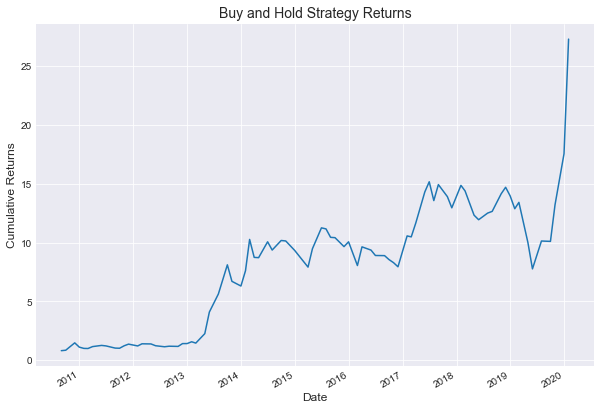

In [34]:
# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot cumulative strategy returns
cum_portfolio_returns.plot(figsize=(10, 7))

# Set title and labels for the plot
plt.title('Buy and Hold Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.show()

As you can see, the strategy performs well over 10 years. Now it's your chance to make the strategy better.
1. Try out the strategy on different stocks
2. Change the rebalancing period from monthly to quarterly, yearly or other frequency.

In the upcoming section, you will learn to deploy the same strategy in the live market.<br><br>

Как вы можете видеть, стратегия хорошо работает в течение 10 лет. Теперь это ваш шанс сделать стратегию лучше.
1. Опробуйте стратегию на разных акциях
2. Измените период перебалансировки с ежемесячного на ежеквартальный, годовой или другой период.

В следующем разделе вы научитесь применять ту же стратегию на реальном рынке.

## Frequently Asked Questions

 

 

### Where can I get the data and Python code files used in the course?

 

All the data used in the course and the Python code files are available in a downloadable zip folder in the last unit of the course.  

 

 

### How to get the data for stocks, currency pairs, commodities, stock indices ETFs?

 

You can download the stocks, currency pairs, commodities and stock indices ETFs data from finance.yahoo.com. You need to specify the ticker which you want to fetch. For example, specify EURCHF=X to get the data for the EURCHF currency pair. 

 

You can also check out the article on stock market data and analysis in Python. It covers how to get and analyse the stock market data such as price, volume, and fundamental data using Python packages. Click here to read more.

Source: QuantInsti

 

 

### Where can I read more on Python?

 

The Python handbook gives an introduction to Python and its libraries such as Pandas, NumPy, and Matplotlib. Click here to read more.

Source: QuantInsti

 
 

## Часто Задаваемые Вопросы





## Где я могу получить файлы данных и кода Python, используемые в курсе?



__Все данные, используемые в курсе, и файлы кода Python доступны в загружаемой zip-папке в последнем блоке курса.__





## Как получить данные по акциям, валютным парам, сырьевым товарам, фондовым индексам ETF?



__Вы можете загрузить данные по акциям, валютным парам, сырьевым товарам и фондовым индексам ETF из finance.yahoo.com. Вам нужно указать тикер, который вы хотите получить. Например, укажите EURCHF=X, чтобы получить данные для валютной пары EURCHF.__
https://finance.yahoo.com/



__Вы также можете ознакомиться со статьей о данных и анализе фондового рынка на Python. В нем рассказывается о том, как получать и анализировать данные фондового рынка, такие как цена, объем и фундаментальные данные, с помощью пакетов Python. Нажмите здесь, чтобы узнать больше.__
https://blog.quantinsti.com/stock-market-data-analysis-python/





## Где я могу прочитать больше о Python?



__Руководство по Python содержит введение в Python и его библиотеки, такие как Pandas, NumPy и Matplotlib. Нажмите здесь, чтобы узнать больше.__
https://www.quantinsti.com/Python-Basics-Handbook.pdf

# Section 11

## Инициализировать функцию
Первым шагом в написании стратегии является определение функции инициализации. Перед началом стратегии функция
initialize() будет вызвана и передана в контекстной переменной. Контекст-это постоянное
пространство имен для хранения переменных, к которым вам необходимо получить доступ из любой точки вашего алгоритма.


In [35]:
#Синтаксис:
def initialize(context):
 pass


## Функция расписания
Внутри функции инициализации вы можете запланировать логику стратегии. Функция schedule_function из
zipline.api позволяет указать, в какие дни и в какое время вы хотите запустить функцию. Это означает,
вы можете легко запланировать запуск функции один раз в день, один раз в месяц или выполнять ордера только за 10 минут
до закрытия рынка.


In [36]:
#Синтаксис
schedule_function(
 func = <<Name of the function>>,
 date_rule = <<Date rules>>,
 time_rule = <<Time rules>> )

SyntaxError: invalid syntax (<ipython-input-36-1c084ae9915e>, line 3)

## Параметры
Функция параметров (___func___): Это первый параметр функции расписания. Здесь передается имя функции, которая должна быть запланирована.

___date_rules___: Мы можем указать различные правила для планирования функции. Например, каждый день, начиная с
недели или начало месяца
Ежемесячные режимы<br>
● month_start<br>
● month_end<br>

Он принимает параметр __days_offset__ для смещения выполнения функции на определенное количество торговых дней
с начала и конца месяца соответственно. Все дневные расчеты производятся с использованием торговых дней
для выбранного вами торгового календаря. Если смещение превышает количество торговых дней в месяце,
функция не запускается в течение этого месяца.

Еженедельные режимы<br>
● week_start<br>
● week_end<br>

Он также принимает параметр days_offset. Если выполнение функции запланировано на рыночный праздник и
в неделе есть еще как минимум один торговый день, функция будет работать на следующий торговый день. Если в неделе
больше нет торговых дней, функция не запускается в течение этой недели. Указание date_rules как every_day
будет выполняться один раз в день.

___time_rules___:<br>
● market open<br>
● market close<br>
Он принимает часы и минуты в качестве параметров.<br>
__Пример__<br>
Функция стратегии вызывается в начале недели в 12 часов дня.<br>




In [ ]:
# Вызовите функцию стратегии в первый торговый день каждой недели в 12 часов дня
schedule_function(strategy,
 date_rules.week_start(days_offset=0),
 time_rules.market_open(hours=2, minutes=30))

## Дополнительная функция
После инициализации стратегии функция handle_data() вызывается каждую минуту. При каждом вызове он
передает одну и ту же контекстную переменную и объект данных, содержащий текущий торговый бар с ценами открытия, максимума,
минимума и закрытия (OHLC), а также объем для всех валютных пар.


In [37]:
#Пример:
def handle_data(context, data):
 pass

## Выборка данных
Функция data.history используется для получения ценовых данных по валютным парам.<br>
__Параметры__<br>
● __assets__ (активы): символ валютной пары или повторяющиеся символы валютной пары<br>
● __fields__ (поля): строка или повторяющиеся строки. Допустимыми значениями являются "цена", "открытие", "максимум", "минимум", "закрытие" и
"объем".<br>
● __bar_count__: целое число баров торговых данных.<br>
● __frequency__ (частота): "1m" для минутных данных или " 1d " для ежедневных данных. Для других частот используйте
функцию повторной выборки pandas.<br>
__Возвращение__<br>
● фрейм данных pandas индексируется по дате

In [ ]:
# Пример
# Получить данные за последние 100 дней
 security_data = data.history(
 assets = symbol(FXCM(‘EUR/USD’)),
 fields = ‘price’,
 bar_count = 100,
)

__price__(цена) заполняется вперед, возвращая последнюю известную цену, если она есть, в противном случае возвращается NaN. В приведенном
выше коде мы сохранили исторические дневные данные о ценах за последние 100 дней в панд security_data
Фрейм данных.

Примечание:
data.history() может возвращать любое из следующих значений:<br>
● объект серии Pandas (если запрос предназначен для одной безопасности и одного поля)<br>
● объект фрейма данных Pandas (несколько ценных бумаг и одно поле - с ценными бумагами в столбцах или
с одной защитой и несколькими полями - поля в столбцах)<br>
● объект данных панели Pandas (несколько ценных бумаг И несколько полей - ценные бумаги на малой оси). Возвращаемые объекты серии или фрейма данных будут индексироваться по датам, а объекты данных панели будут
индексироваться по полям. Чтобы узнать больше о серии Pandas, кадрах данных и панельных данных, см. Здесь:
https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

## Функции размещения заказов
Как только основная логика стратегии будет определена, вам необходимо разместить ордера у своего брокера. Чтобы разместить заказ, стратегия
должна указать актив и другие параметры заказа.

__order__( asset, quantity) (заказ( актив, количество))
Вы также можете указать рыночные, лимитные ордера или другие типы ордеров, поддерживаемые используемой платформой и брокером.

В то время как ордер является базовой функцией для торговли, существует множество других вспомогательных функций, которые автоматически
определяют размер ордера. order_value и order_target_percent являются широко используемыми функциями определения размера заказа.

__order_value__(asset, value) (актив, значение)
Разместите заказ на актив с определенной стоимостью в долларах
order_target_percente(asset, percent) (актив, процент)
Разместите заказ на актив с определенным процентом от текущей стоимости портфеля

# Дополнительная литература по автоматической торговле

Документ Blueshift

 

Blueshift - это платформа для систематического тестирования и тестирования торговых стратегий на Python. Эта страница предоставит вам быстрый старт для создания стратегии на Blueshift. В нем обсуждаются различные функции для получения данных об активах, размещения заказов и планирования стратегии. Нажмите здесь, чтобы читать дальше. 
https://blueshift.quantinsti.com/docs/
Источник: Blueshift

 

 

Концепции платформы Blueshift

 

На этой странице обсуждаются специальные функции и переменные, необходимые для создания торговой стратегии на Blueshift. Здесь также обсуждаются некоторые функции API, которые обычно используются в Blueshift. Нажмите здесь, чтобы читать дальше.
https://blueshift.quantinsti.com/docs/concepts/
Источник: Blueshift

 

 

Документация IBridgePy

 

В этом документе обсуждается метод подключения торговой стратегии к Interactive Brokers с помощью IBridgePy. В нем также обсуждаются различные функции, необходимые для получения данных, логики стратегии планирования и размещения заказов через IBridgePy. Нажмите здесь, чтобы читать дальше. 
https://ibridgepy.com/documentation/
Источник: IBridgePy

 

 

Событийное и векторизованное бэктестирование

 

На этой странице Elite Trader есть поучительное обсуждение событийного и векторизованного тестирования на истории. Нажмите здесь, чтобы читать дальше. 
https://www.elitetrader.com/et/threads/vectorized-vs-event-driven-backtesting.290658/
Источник: Elite Trader

# Blueshift

## Как обработать ошибку окна истории?

Ошибка окна истории возникает, когда дата начала обратного тестирования предшествует периоду обратного просмотра, определенному
при извлечении данных. Например, если вы получаете ежедневные данные для символа "AAPL" в течение 252
дней. И дата начала, доступная для данного набора данных,-2 января 2008 года. В этом случае вам следует расширить окно
истории и начать тестирование с 12 декабря 2008 года или после этой даты, то есть через 252 торговых дня после
2 января 2008 года.

## Как обработать ошибку набора данных или символ не был найден?

Обычно это происходит потому, что ваш код ссылается на символ актива, которого нет в наборе данных, который вы использовали для запуска
стратегии. Например, если вы извлекаете данные для символа "AAPL" и выбираете набор данных для NSE Ежедневно
или поминутно. Тогда, в этом случае, вы получите символ "AAPL" не была найдена ошибка, потому что символ "AAPL"
или акции Apple не торгуются на NSE. Вы должны выбрать NYSE Daily или Minute, поскольку акции Apple торгуются
на NYSE. Наборы данных, доступные на Blueshift, можно найти здесь.
## Как справиться с ошибкой тайм-аута или что-то пошло не так?

Если вы получаете ошибку тайм-аута, вы можете попробовать использовать меньший диапазон дат.
Как вернуться к ранее отработанной стратегии
Вы можете нажать на вкладку Стратегии вверху, чтобы вернуться ко всем стратегиям, над которыми вы ранее работали.
